In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats


In [2]:
# Load togo-dapaong dataset
df = pd.read_csv("../data/togo-dapaong_qc.csv")
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [3]:
# Summary for numerical columns
print("The description of numeric columns")
print(df.describe())
# Overview of categorical columns
print("------------------------------")
print("The description of categorical columns")
print(df.describe(include=['object']))
# Overview of all columns
print("------------------------------")
print("The description of all columns")
print(df.describe(include='all'))
# Overview of the dataset
print("------------------------------")
print("Print an overview of the dataset: the last 5 rows")
print(df.tail())
# Overview of the dataset
print("------------------------------")
print("Print an overview of the dataset: a random sample of 5 rows")
print(df.sample(5))
# Overview of the dataset
print("------------------------------")
print("Print an overview of the dataset: the shap of dataset")
print(df.info())
# Check for missing values
print("------------------------------")
print("Check for missing values")
print(df.isna().sum())


The description of numeric columns
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000  


🚨 Outlier Counts Per Column:
 WSgust    3915
WS        3510
DHI       3415
DNI       1062
GHI        305
ModB       206
ModA       137
dtype: int64

📊 Boxplot Before Cleaning


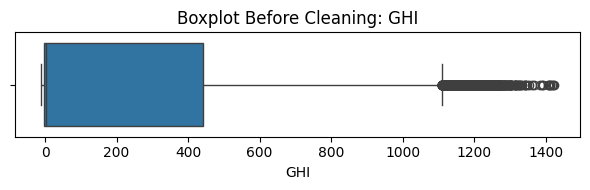

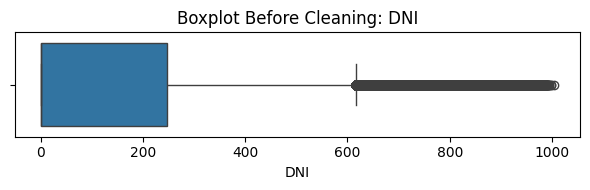

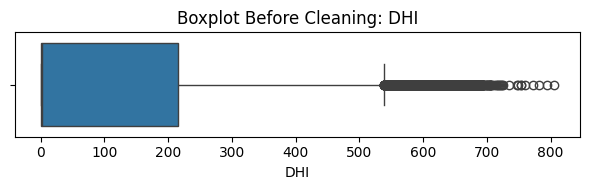

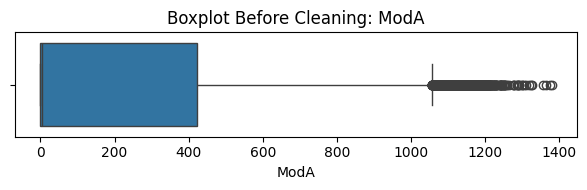

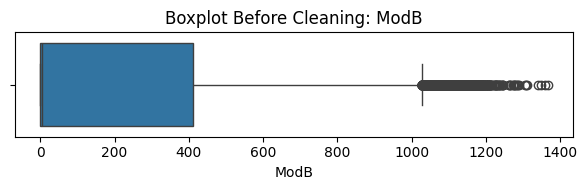

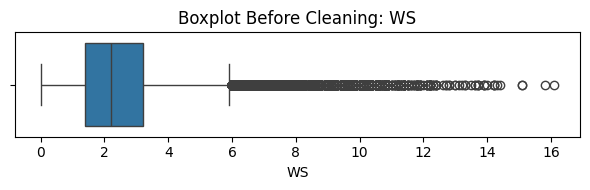

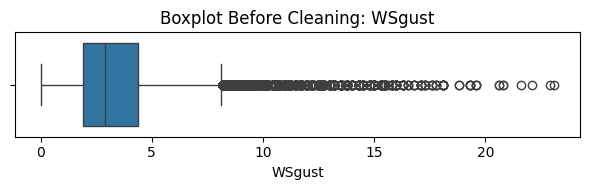

In [ ]:
# -------------------------------
# Outlier Detection with Z-score
# -------------------------------

from scipy.stats import zscore

# Select relevant columns
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores and detect outliers
z_scores = df[columns_to_check].apply(zscore, nan_policy='omit')
outliers = (z_scores.abs() > 3)

# Count of outliers per column
print("\n🚨 Outlier Counts Per Column:\n", outliers.sum().sort_values(ascending=False))


# -------------------------------
#  Visualize Outliers (Before)
# -------------------------------
print("\n📊 Boxplot Before Cleaning")
for col in columns_to_check:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot Before Cleaning: {col}")
    plt.tight_layout()
    plt.show()



📐 Original Shape: (525600, 19)
✅ Cleaned Shape: (516349, 19)
❌ Rows Removed: 9251

📈 EDA After Cleaning:
                 GHI            DNI            DHI           ModA  \
count  516349.000000  516349.000000  516349.000000  516349.000000   
mean      223.859675     147.975931     112.781249     219.380751   
std       317.306277     247.683690     151.571744     311.854841   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         0.500000       0.000000       1.500000       2.800000   
75%       423.200000     237.900000     211.600000     404.100000   
max      1198.000000     904.100000     586.000000    1171.200000   

                ModB             WS         WSgust  
count  516349.000000  516349.000000  516349.000000  
mean      213.028150       2.312185       3.154247  
std       302.625802       1.377997       1.762192  
min         0.000000       0.000000       0.000000  
25%    

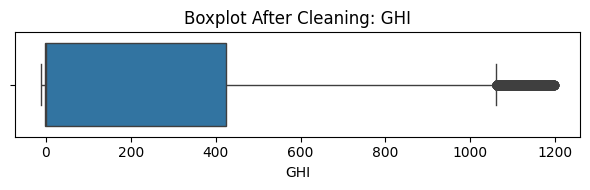

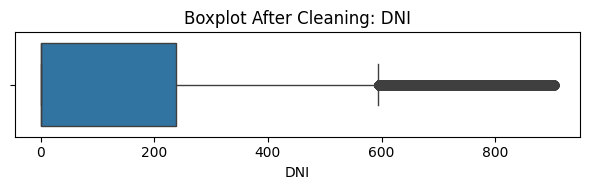

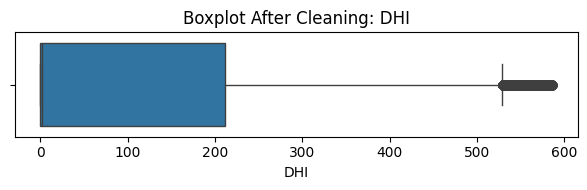

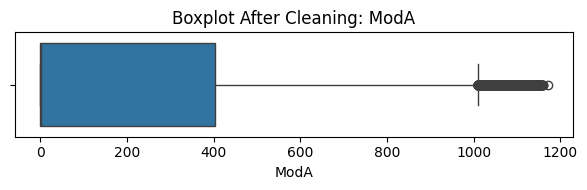

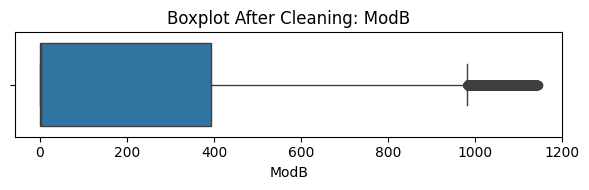

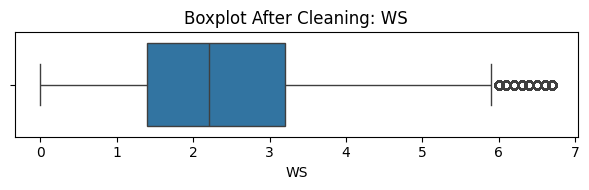

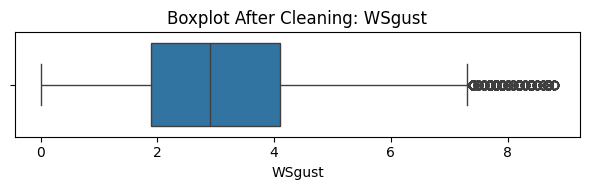


✅ Cleaned data saved to '../data/togo_clean.csv'


In [ ]:
# -------------------------------
# Impute Missing Values with Median
# -------------------------------
for col in columns_to_check:
    df[col] = df[col].fillna(df[col].median())

# -------------------------------
#  Drop Outlier Rows
# -------------------------------
df_clean = df[(z_scores.abs() <= 3).all(axis=1)]

# -------------------------------
#  Shape Comparison
# -------------------------------
print(f"\n📐 Original Shape: {df.shape}")
print(f"✅ Cleaned Shape: {df_clean.shape}")
print(f"❌ Rows Removed: {df.shape[0] - df_clean.shape[0]}")

# -------------------------------
#  Summary After Cleaning
# -------------------------------
print("\n📈 EDA After Cleaning:")
print(df_clean[columns_to_check].describe())

# -------------------------------
#  Visualize After Cleaning
# -------------------------------
print("\n📊 Boxplot After Cleaning")
for col in columns_to_check:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df_clean[col])
    plt.title(f"Boxplot After Cleaning: {col}")
    plt.tight_layout()
    plt.show()

# -------------------------------
#  Save Cleaned Data
# -------------------------------
df_clean.to_csv("../data/togo_clean.csv", index=False)
print("\n✅ Cleaned data saved to '../data/togo_clean.csv'")

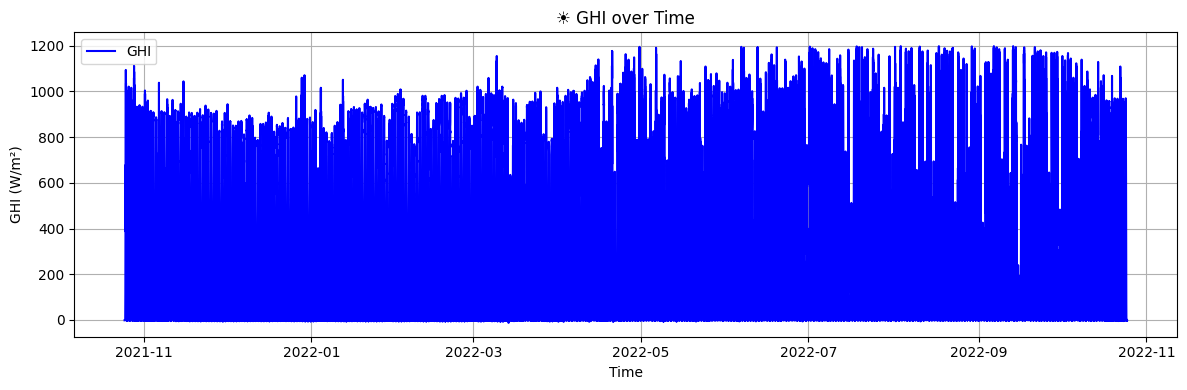

/tmp/ipykernel_228023/1402488886.py:27: UserWarning: Glyph 128262 (\N{HIGH BRIGHTNESS SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/media/teddy/Local Disk(D)/Tenx  /projects/solar-challenge-week1/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128262 (\N{HIGH BRIGHTNESS SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


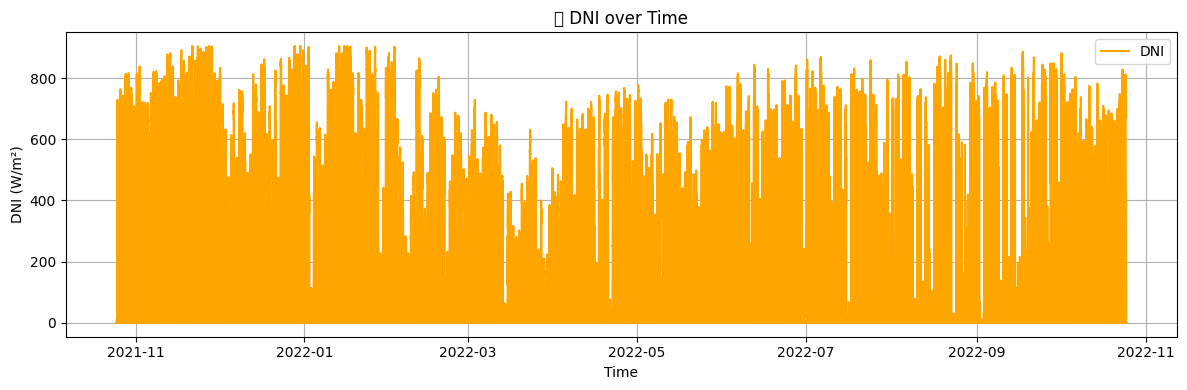

/tmp/ipykernel_228023/1402488886.py:37: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/media/teddy/Local Disk(D)/Tenx  /projects/solar-challenge-week1/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


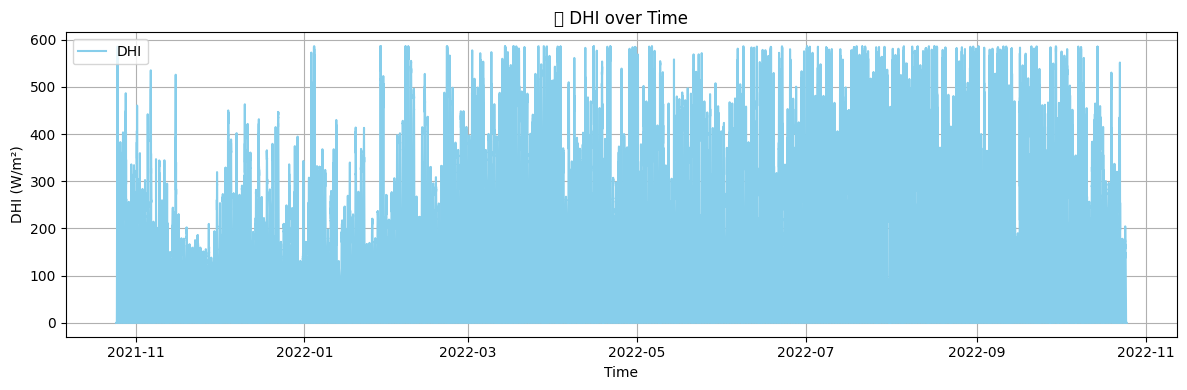

/tmp/ipykernel_228023/1402488886.py:48: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/media/teddy/Local Disk(D)/Tenx  /projects/solar-challenge-week1/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


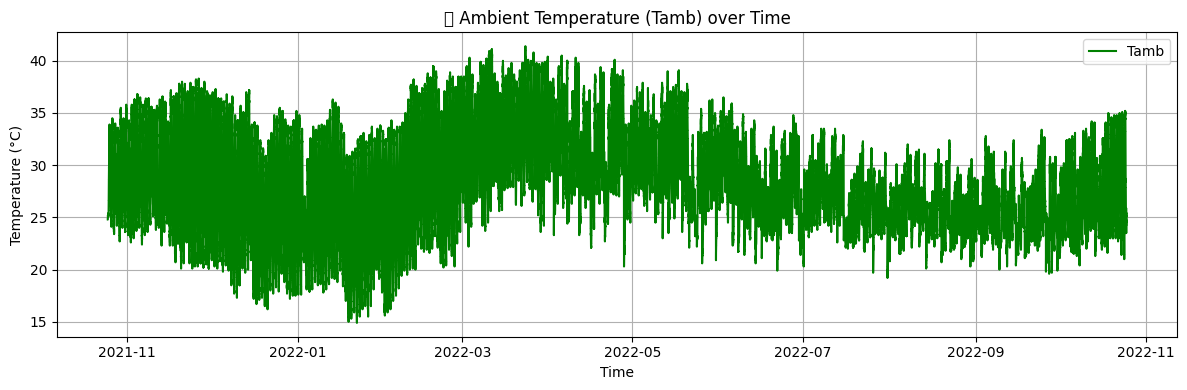

In [23]:
#Time Series Plots

# Avoid SettingWithCopyWarning by copying the DataFrame
df_clean = df_clean.copy()
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Set Timestamp as index (optional but helpful)
df_clean.set_index('Timestamp', inplace=True)

# Plot GHI
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_clean, x=df_clean.index, y='GHI', label='GHI', color='blue')
plt.title("☀️ GHI over Time")
plt.xlabel("Time")
plt.ylabel("GHI (W/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot DNI
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_clean, x=df_clean.index, y='DNI', label='DNI', color='orange')
plt.title("🔆 DNI over Time")
plt.xlabel("Time")
plt.ylabel("DNI (W/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot DHI
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_clean, x=df_clean.index, y='DHI', label='DHI', color='skyblue')
plt.title("💡 DHI over Time")
plt.xlabel("Time")
plt.ylabel("DHI (W/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Tamb (Ambient Temperature)
if 'Tamb' in df_clean.columns:
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df_clean, x=df_clean.index, y='Tamb', label='Tamb', color='green')
    plt.title("🌡️ Ambient Temperature (Tamb) over Time")
    plt.xlabel("Time")
    plt.ylabel("Temperature (°C)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Tamb' not found in df_clean.")


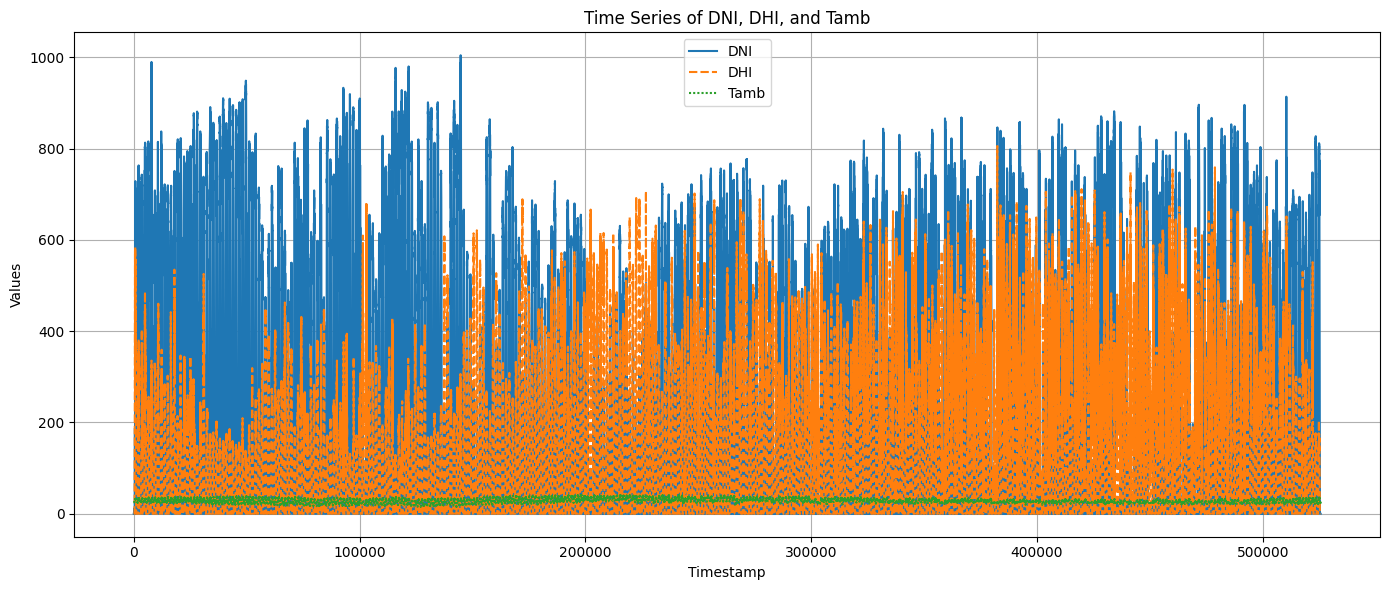

In [ ]:
# Multi-Line Plot (All Together)

plt.figure(figsize=(14, 6))
sns.lineplot(data=df[["DNI", "DHI", "Tamb"]])
plt.title("Time Series of DNI, DHI, and Tamb")
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: >

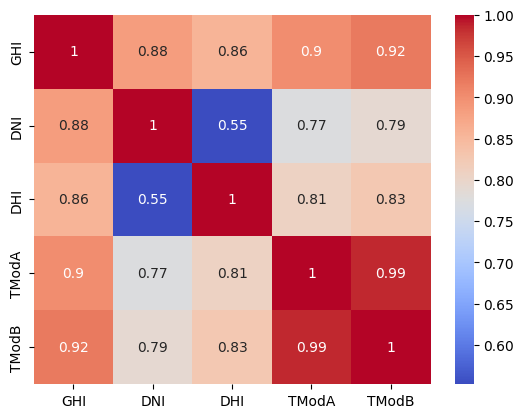

In [16]:
#Correlation Heatmap


corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')


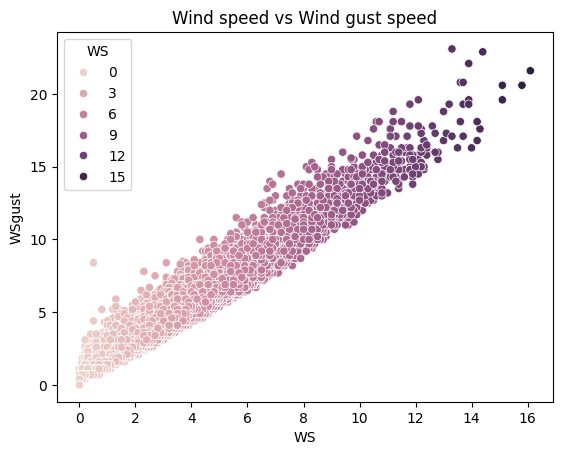

/media/teddy/Local Disk(D)/Tenx  /projects/solar-challenge-week1/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


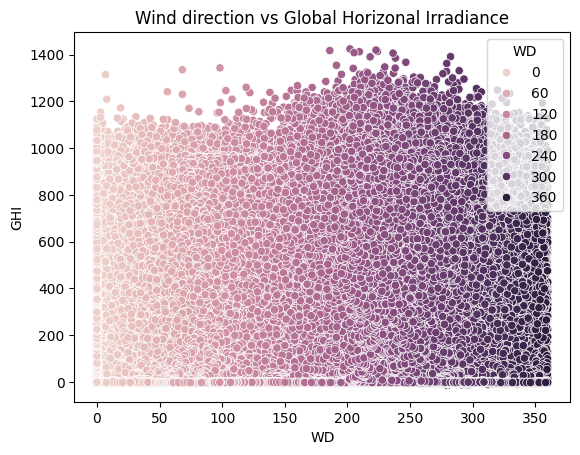

/media/teddy/Local Disk(D)/Tenx  /projects/solar-challenge-week1/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


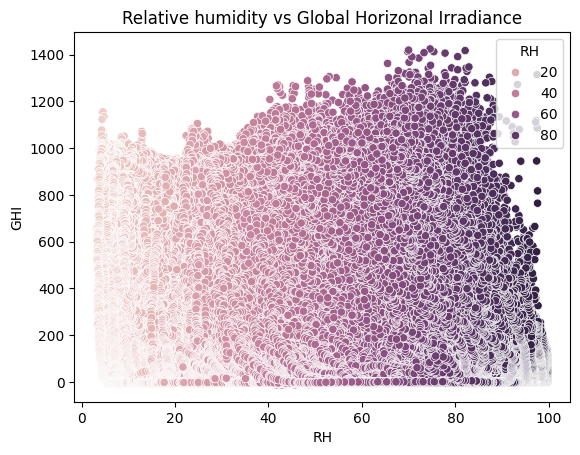

In [6]:
#Scatter and Distribution Plots

sns.scatterplot(data=df, x="WS", y="WSgust", hue="WS")
plt.title("Wind speed vs Wind gust speed")
plt.show()

sns.scatterplot(data=df, x="WD", y="GHI", hue="WD")
plt.title("Wind direction vs Global Horizonal Irradiance")
plt.show()

sns.scatterplot(data=df, x="RH", y="GHI", hue="RH")
plt.title("Relative humidity vs Global Horizonal Irradiance")
plt.show()